# Sonar Mines vs. Rocks Classification Predication


This notebook trains different classification models to determine an object is a rock or a mine based on sonar signals.  
The classification models attempted include K-nearest neighbours, logistic regression, SVM, random forest, gradient-boosted random forest, neural networks. The models are trained and tuned with optimal parameters and evaluated by test accuracy scores and confusion matrix.

## Data preprocessing 

In [19]:
import pandas as pd
import numpy as np

#load data
data = pd.read_csv('sonar.all-data', sep=',', header = None)
#print(data.shape)

#X, y 
X = data.loc[:, 0:59]
#print(X.shape)

y_data = data.loc[:,60]
y_data_dummy = pd.get_dummies(y_data)
y = y_data_dummy.iloc[:,0]
    

In [20]:
#train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(156, 60) (156,) (52, 60) (52,)


<IPython.core.display.Javascript object>


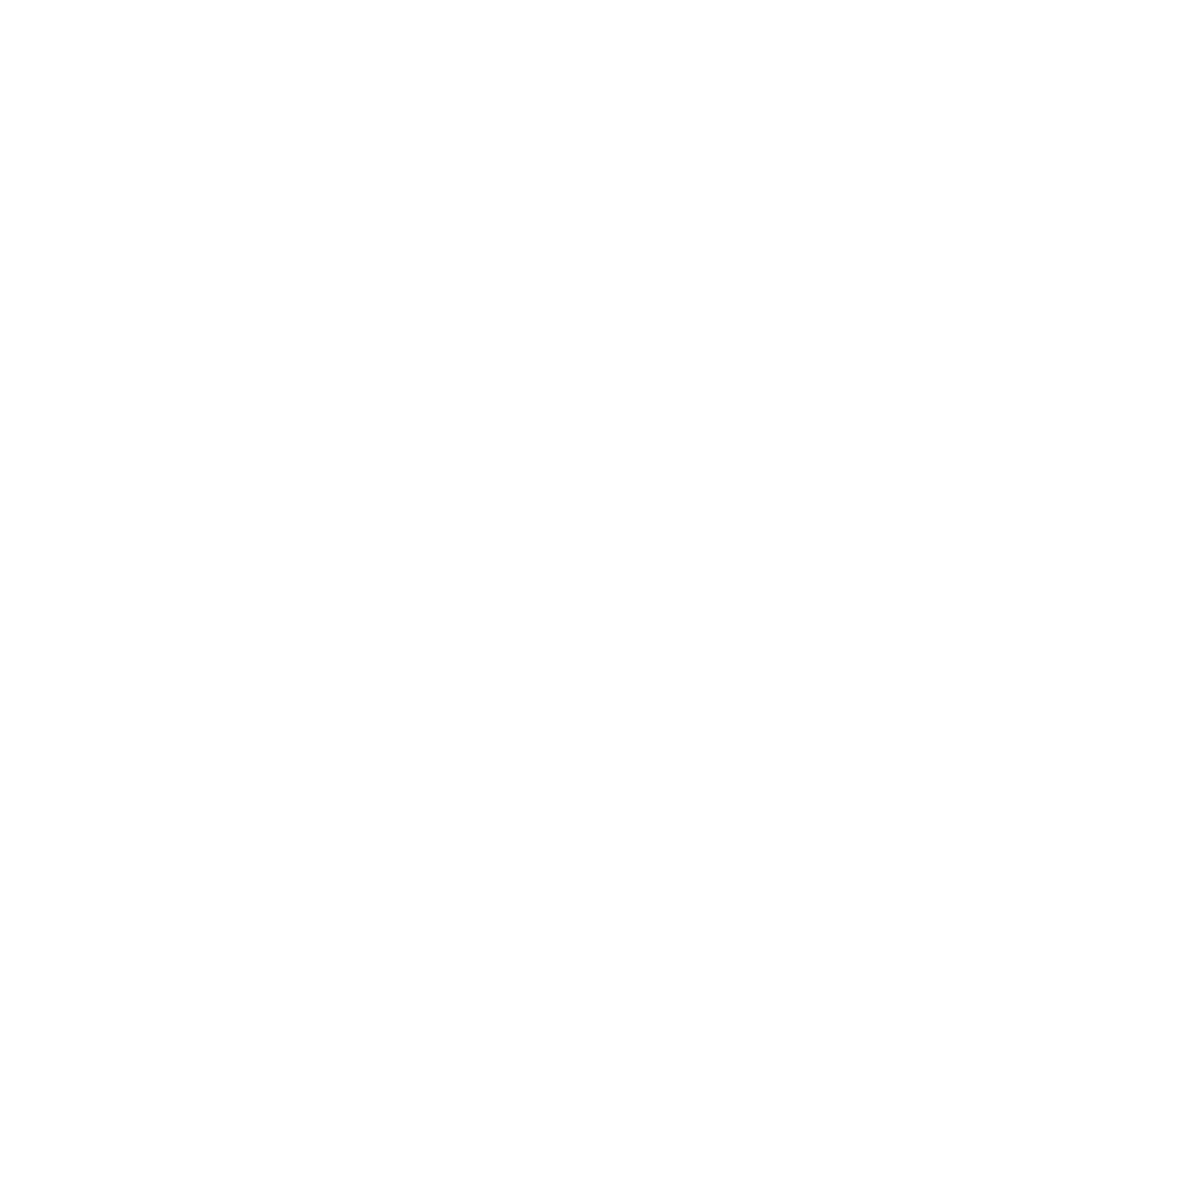

<IPython.core.display.Javascript object>


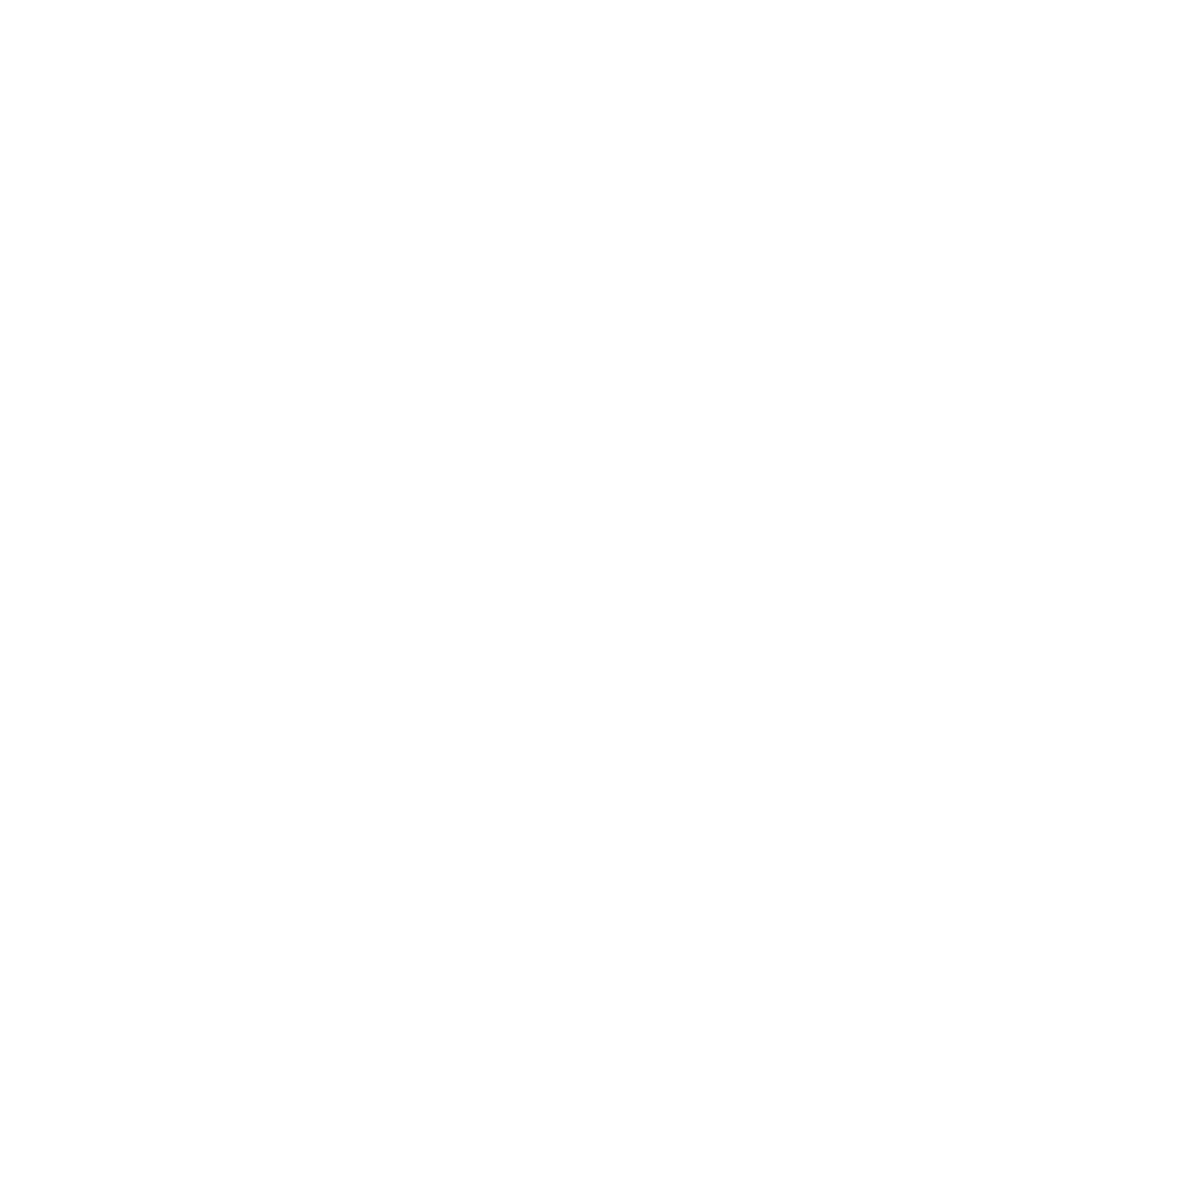

In [21]:
#Raw data EDA to see if raw data is normally distributed

%matplotlib notebook
import matplotlib.pyplot as plt

X.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12)); 

X.plot(kind='density', subplots=True, layout=(8,8), sharex=False,  
       legend=False, fontsize=1, figsize=(12,12));


In [22]:
#Data normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))


<IPython.core.display.Javascript object>


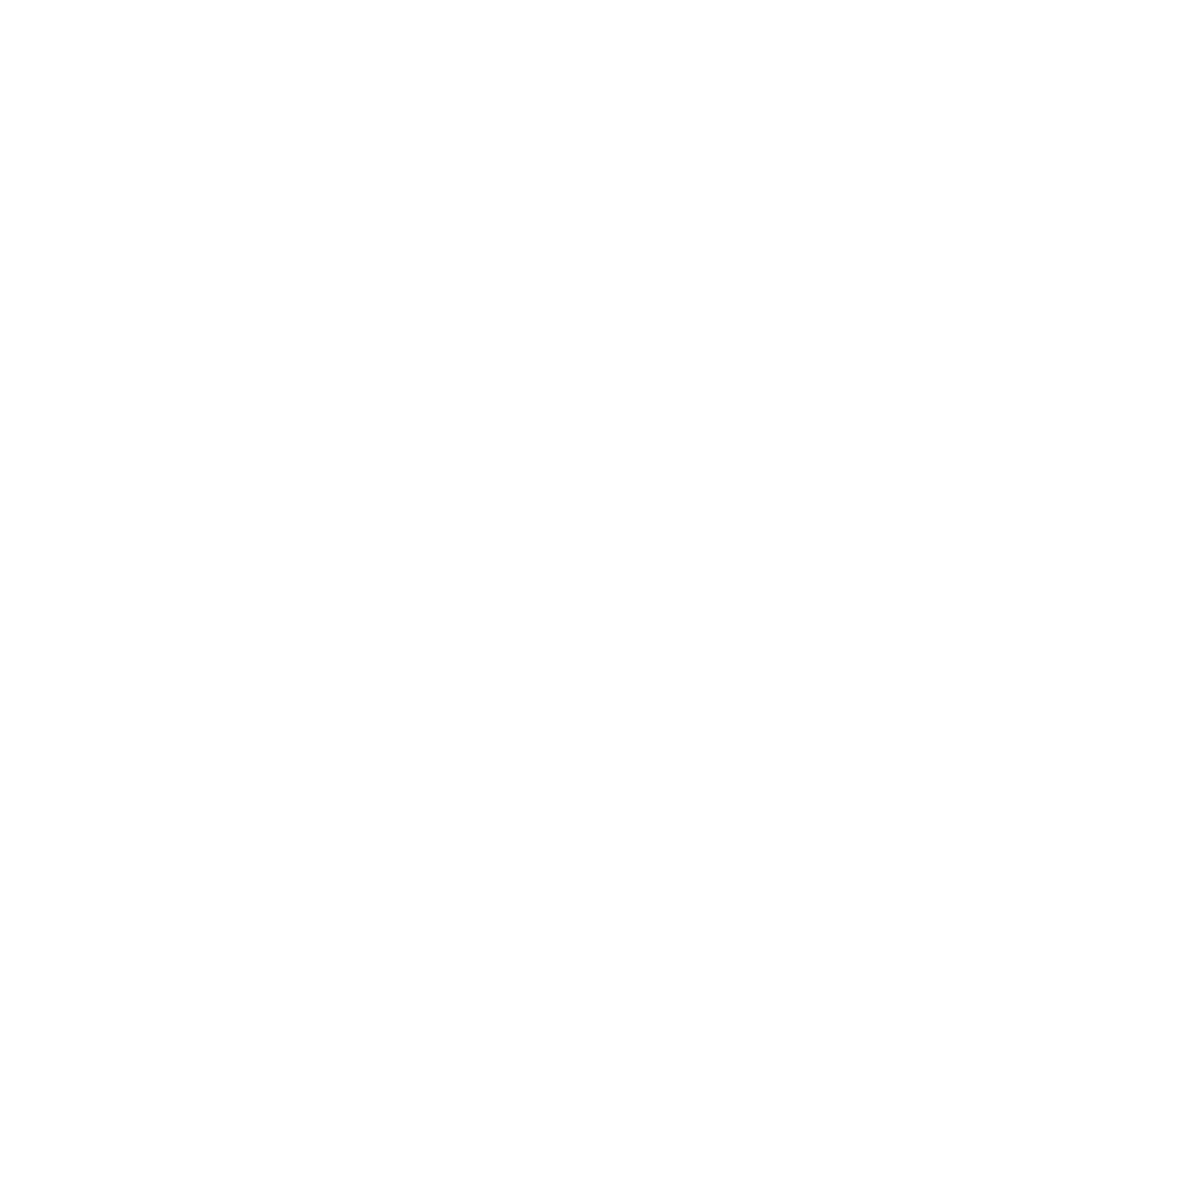

<IPython.core.display.Javascript object>


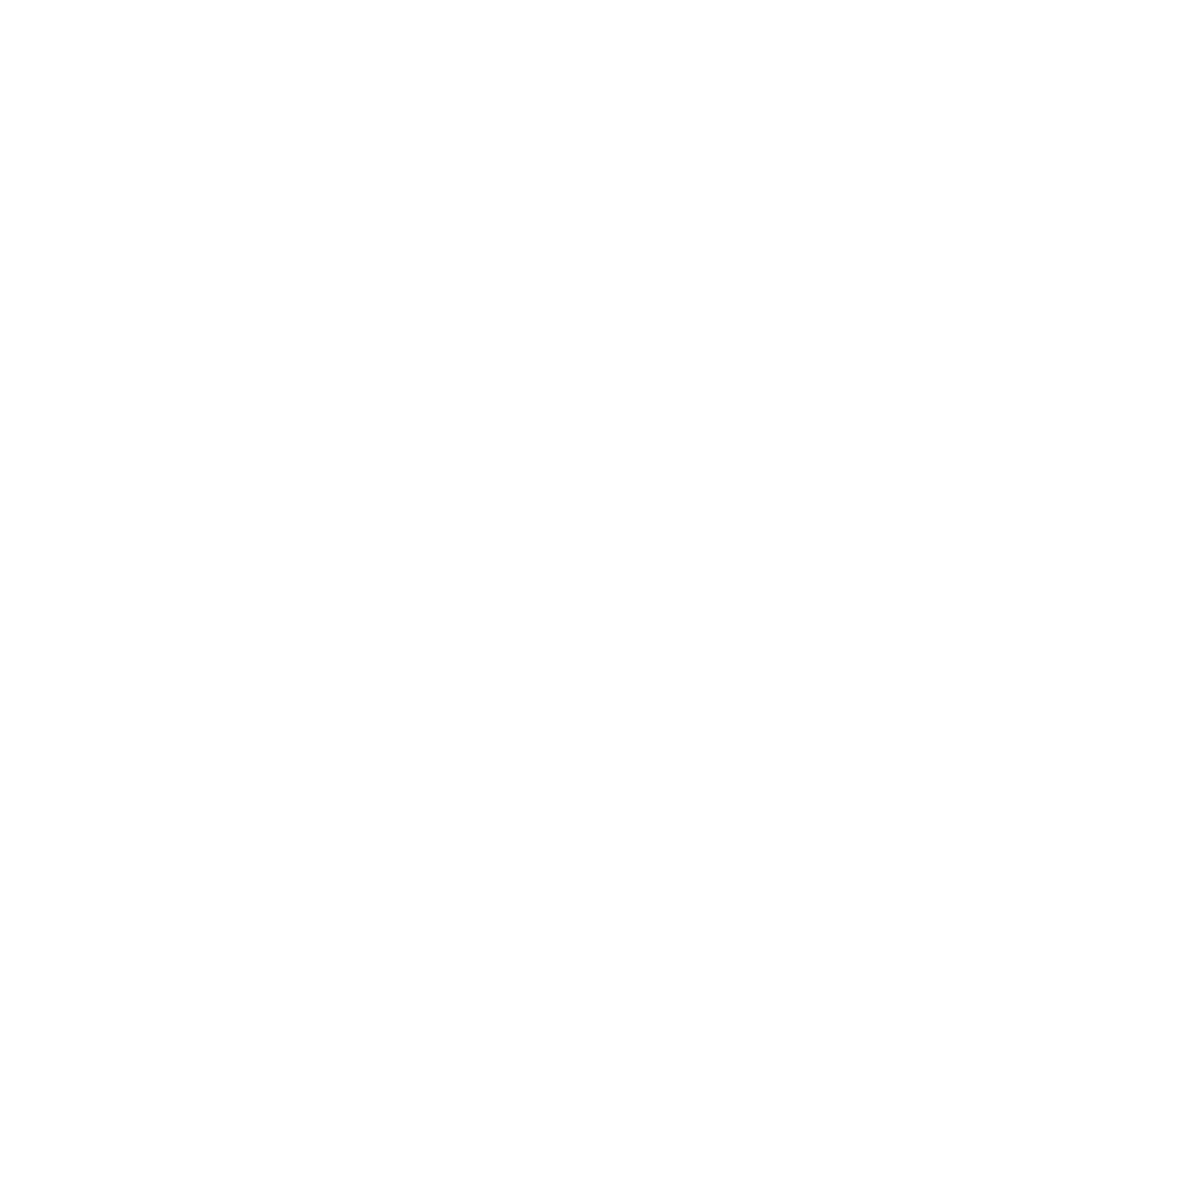

In [23]:
#Normalized data EDA to see if normalized data is normally distributed

X_train_scaled.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12)); 

X_train_scaled.plot(kind='density', subplots=True, layout=(8,8),  
                    sharex=False, legend=False, fontsize=1, figsize=(12,12));

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

knnreg = KNeighborsClassifier()
grid_values_K = {'n_neighbors':[1,3,5,7,9,11]}

grid_knnreg = GridSearchCV(knnreg, param_grid = grid_values_K, cv = 5, scoring = 'accuracy',  
                           return_train_score=True, iid=False)
grid_knnreg.fit(X_train_scaled, y_train)

knnreg_pred = grid_knnreg.predict(X_test_scaled)
#print(knnreg_pred)

k = grid_knnreg.best_params_
acc_k = accuracy_score(y_test,knnreg_pred)

confusion_k = confusion_matrix(y_test,knnreg_pred)

print('KNN classifier with K= {} has the test accuracy score of {:.4f}.'.
      format(k, acc_k))

print('KNN optimal classifier confusion matrix is \n', confusion_k)


KNN classifier with K= {'n_neighbors': 1} has the test accuracy score of 0.8654.
KNN optimal classifier confusion matrix is 
 [[21  5]
 [ 2 24]]


### Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
grid_values_C = {'C':[0.01, 0.1, 1, 5, 10]}

log_reg = GridSearchCV(logreg, param_grid = grid_values_C, cv=5, scoring = 'accuracy', return_train_score=True, iid=False)
log_reg.fit(X_train_scaled, y_train)

logreg_pred = log_reg.predict(X_test_scaled)
#print(logreg_pred)

acc_log = accuracy_score(y_test,logreg_pred)
C = log_reg.best_params_

confusion_C = confusion_matrix(y_test, logreg_pred)

print('Logistic regression with the inverse of regularization strength C = {} has the test accuracy score of {:.4f}.'.
      format(C, acc_log))

print('Optimal logistic regression confusion matrix is \n', confusion_k)


Logistic regression with the inverse of regularization strength C = {'C': 10} has the test accuracy score of 0.8462.
Optimal logistic regression confusion matrix is 
 [[21  5]
 [ 2 24]]


### SVC

In [28]:
from sklearn.svm import SVC
#SVC with linear kernal

svm_linear = SVC(kernel='linear', class_weight='balanced', random_state = 0)
grid_values_linear = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_svm_linear = GridSearchCV(svm_linear, param_grid = grid_values_linear, cv = 5, scoring = 'accuracy', iid=False)
grid_svm_linear.fit(X_train_scaled, y_train)


svm_pred_linear = grid_svm_linear.predict(X_test_scaled)
#print(svm_pred_linear)

acc_svm_linear = accuracy_score(y_test,svm_pred_linear)
gamma = grid_svm_linear.best_params_

confusion_svm_linear = confusion_matrix(y_test, svm_pred_linear)

print('SVC with the gamma = {} has the test accuracy score of {:.4f}.'.
      format(gamma, acc_svm_linear))

print('Optimal SVC with linear kernal confusion matrix is \n', confusion_svm_linear, '\n')


#SVC with RBF kernal

svm = SVC(kernel='rbf', class_weight='balanced', random_state = 0)
grid_values_svm = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svm = GridSearchCV(svm, param_grid = grid_values_svm, cv = 5, scoring = 'accuracy', iid=False)
grid_svm.fit(X_train_scaled, y_train)

svm_pred = grid_svm.predict(X_test_scaled)
#print(svm_pred)


acc_svm_rbf = accuracy_score(y_test,svm_pred)
gamma_rbf = grid_svm.best_params_

confusion_svm_rbf = confusion_matrix(y_test, svm_pred)

print('SVC with the gamma = {} has the test accuracy score of {:.4f}.'.
      format(gamma, acc_svm_rbf))

print('Optimal SVC with linear kernal confusion matrix is \n', confusion_svm_rbf)



SVC with the gamma = {'gamma': 0.001} has the test accuracy score of 0.8269.
Optimal SVC with linear kernal confusion matrix is 
 [[21  5]
 [ 4 22]] 

SVC with the gamma = {'gamma': 0.001} has the test accuracy score of 0.8462.
Optimal SVC with linear kernal confusion matrix is 
 [[19  7]
 [ 1 25]]


### Naive Bayes classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

acc_nb = accuracy_score(y_test,nb_pred)
confusion_svm_nb = confusion_matrix(y_test, nb_pred)

print('Naive Bayes classifier has the test accuracy score of {:.4f}.'.
      format(acc_nb))


print('Naive Bayes classifier confusion matrix is \n', confusion_svm_nb)


Naive Bayes classifier has the test accuracy score of 0.7308.
Naive Bayes classifier confusion matrix is 
 [[18  8]
 [ 6 20]]


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
grid_values_rf = {'max_depth': [5, 10, 50, 100]}

grid_rf = GridSearchCV(rf, param_grid = grid_values_rf, cv = 5, scoring = 'accuracy', iid=False)
grid_rf.fit(X_train_scaled, y_train)

rf_pred = grid_rf.predict(X_test_scaled)
#print(rf_pred)

max_rf = grid_rf.best_params_

acc_rf = accuracy_score(y_test, rf_pred)
confusion_rf = confusion_matrix(y_test, rf_pred)

print('Random Forest with the max_depth = {} has the test accuracy score of {:.4f}.'.
      format(max_rf, acc_rf))

print('Random Forest confusion matrix is \n', confusion_rf)

Random Forest with the max_depth = {'max_depth': 10} has the test accuracy score of 0.9038.
Random Forest confusion matrix is 
 [[22  4]
 [ 1 25]]


### Gradient-boosted decision trees 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 0)

grid_values_gb = {'max_depth': [5, 10, 20, 50, 100], 'learning_rate': [0.01, 0.1, 0.5, 1, 5, 10]}

grid_gb = GridSearchCV(gb, param_grid = grid_values_gb, cv = 5, scoring = 'accuracy', iid=False)
grid_gb.fit(X_train_scaled, y_train)

gb_rf = grid_gb.best_params_

gb_pred = grid_gb.predict(X_test_scaled)
#print(gb_pred)


acc_gb = accuracy_score(y_test, gb_pred)
confusion_gb = confusion_matrix(y_test, gb_pred)

print('Gradient-boosted decision tree with the parameters {} has the test accuracy score of {:.4f}.'.
      format(gb_rf, acc_gb))

print('Gradient-boosted decision tree confusion matrix is \n', confusion_gb)


Gradient-boosted decision tree with the parameters {'learning_rate': 0.5, 'max_depth': 5} has the test accuracy score of 0.7692.
Gradient-boosted decision tree confusion matrix is 
 [[17  9]
 [ 3 23]]


### Neural Networks

In [34]:
#Neural Networks with one hidden layer
from sklearn.neural_network import MLPClassifier


for units in [1, 10, 20, 30]:
    for this_alpha in [0.01, 0.1, 0.5, 1]:
        for this_activation in ['logistic', 'relu', 'tanh']:
            nnclf = MLPClassifier(hidden_layer_sizes = units, solver='lbfgs', alpha = this_alpha, activation = this_activation,
                         random_state = 0).fit(X_train_scaled, y_train)
            
            nnclf_pred = nnclf.predict(X_test_scaled)
            acc = accuracy_score(y_test, nnclf_pred)
            print('Neural net classifier 1 layer, {} units, learning rate {}, activation {} has the test accuracy score of {:.4f}'.format(units, this_alpha, this_activation, acc))
            

Neural net classifier 1 layer, 1 units, learning rate 0.01, activation logistic has the test accuracy score of 0.8077
Neural net classifier 1 layer, 1 units, learning rate 0.01, activation relu has the test accuracy score of 0.5000
Neural net classifier 1 layer, 1 units, learning rate 0.01, activation tanh has the test accuracy score of 0.8077
Neural net classifier 1 layer, 1 units, learning rate 0.1, activation logistic has the test accuracy score of 0.8846
Neural net classifier 1 layer, 1 units, learning rate 0.1, activation relu has the test accuracy score of 0.5000
Neural net classifier 1 layer, 1 units, learning rate 0.1, activation tanh has the test accuracy score of 0.7885
Neural net classifier 1 layer, 1 units, learning rate 0.5, activation logistic has the test accuracy score of 0.8269
Neural net classifier 1 layer, 1 units, learning rate 0.5, activation relu has the test accuracy score of 0.5000
Neural net classifier 1 layer, 1 units, learning rate 0.5, activation tanh has th

In [35]:
#Neural Networks with two hidden layers
nnclf_2 = MLPClassifier(hidden_layer_sizes = [20, 20], solver='lbfgs',
                     random_state = 0, alpha = 0.1, activation = 'logistic').fit(X_train_scaled, y_train)

nnclf_pred_2 = nnclf_2.predict(X_test_scaled)
acc_2 = accuracy_score(y_test, nnclf_pred_2)

print('Neural net classifier 2 layers has the test accuracy score of {:.4f}.'.format(acc_2))

Neural net classifier 2 layers has the test accuracy score of 0.9038.


### Test results

In [36]:
print('KNN classifier with K= {} has the test accuracy score of {:.4f}.'.
      format(k, acc_k))
print('Logistic regression with the inverse of regularization strength C = {} has the test accuracy score of {:.4f}.'.
      format(C, acc_log))
print('SVC with the gamma = {} has the test accuracy score of {:.4f}.'.
      format(gamma, acc_svm_linear))
print('SVC with the gamma = {} has the test accuracy score of {:.4f}.'.
      format(gamma, acc_svm_rbf))
print('Naive Bayes classifier has the test accuracy score of {:.4f}.'.
      format(acc_nb))
print('Random Forest with the max_depth = {} has the test accuracy score of {:.4f}.'.
      format(max_rf, acc_rf))
print('Gradient-boosted decision tree with the parameters {} has the test accuracy score of {:.4f}.'.
      format(gb_rf, acc_gb))
print('Neural net classifier 1 layer, 30 units, learning rate 0.01, activation logistic has the test accuracy score of 0.9038')
print('Neural net classifier 2 layers has the test accuracy score of {:.4f}.'.format(acc_2))

KNN classifier with K= {'n_neighbors': 1} has the test accuracy score of 0.8654.
Logistic regression with the inverse of regularization strength C = {'C': 10} has the test accuracy score of 0.8462.
SVC with the gamma = {'gamma': 0.001} has the test accuracy score of 0.8269.
SVC with the gamma = {'gamma': 0.001} has the test accuracy score of 0.8462.
Naive Bayes classifier has the test accuracy score of 0.7308.
Random Forest with the max_depth = {'max_depth': 10} has the test accuracy score of 0.9038.
Gradient-boosted decision tree with the parameters {'learning_rate': 0.5, 'max_depth': 5} has the test accuracy score of 0.7692.
Neural net classifier 1 layer, 30 units, learning rate 0.01, activation logistic has the test accuracy score of 0.9038
Neural net classifier 2 layers has the test accuracy score of 0.9038.


#### Random Forest and Neural Networks with 1 & 2 layers have the best test accuracy score of 90.38%.